# Cohort Analysis

___
## What is a cohort?
A cohort is a group of subjects who share a defining characteristic. We can observe how a cohort behaves across time and compare it to other cohorts. Cohorts are used in medicine, psychology, econometrics, ecology and many other areas to perform a cross-section (compare difference across subjects) at intervals through time.

## Types of cohorts

- **Time Cohorts** are customers who signed up for a product or service during a particular time frame. Analyzing these cohorts shows the customers’ behavior depending on the time they started using the company’s products or services. The time may be monthly or quarterly even daily.
- **Behavior cohorts** are customers who purchased a product or subscribed to a service in the past. It groups customers by the type of product or service they signed up. Customers who signed up for basic level services might have different needs than those who signed up for advanced services. Understaning the needs of the various cohorts can help a company design custom-made services or products for particular segments.
- **Size cohorts** refer to the various sizes of customers who purchase company’s products or services. This categorization can be based on the amount of spending in some periodic time after acquisition or the product type that the customer spent most of their order amount in some period of time.
___

## Import libraries and dataset

In [3]:
# import library
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import datetime as dt

#For Data  Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#For Machine Learning Algorithm
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

df = pd.read_csv('Cleaned Online Retail.csv')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


The dataset was cleaned beforehand so we will explore the data a bit and convert the `InvoiceDate` column to datetime

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324583 entries, 0 to 324582
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    324583 non-null  int64  
 1   StockCode    324583 non-null  object 
 2   Description  324583 non-null  object 
 3   Quantity     324583 non-null  int64  
 4   InvoiceDate  324583 non-null  object 
 5   UnitPrice    324583 non-null  float64
 6   CustomerID   324583 non-null  float64
 7   Country      324583 non-null  object 
 8   Total Sales  324583 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 22.3+ MB


In [6]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324583 entries, 0 to 324582
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    324583 non-null  int64         
 1   StockCode    324583 non-null  object        
 2   Description  324583 non-null  object        
 3   Quantity     324583 non-null  int64         
 4   InvoiceDate  324583 non-null  datetime64[ns]
 5   UnitPrice    324583 non-null  float64       
 6   CustomerID   324583 non-null  float64       
 7   Country      324583 non-null  object        
 8   Total Sales  324583 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 22.3+ MB


___
## Let's do some cohort analysis!

We will create the following columns:
- **Invoice period** indicating the year and month of a single transaction/invoice.
- **Cohort group** representation of the year and month of a customer’s first purchase. This label is common across all invoices for a particular customer.
- **Cohort Period/Index** indicates the customer’s stage in its “lifetime”. The number represents the number of months passed since the first purchase.

In [18]:
def get_month(x): 
    """
    This function takes in a datetime object and returns a datetime object with day set to 1.
    Input: Datetime Object
    Return: Datetime Object
    """
    return dt.datetime(x.year,x.month,1)

# We get the Month and Year of the invoice
df['InvoiceMonth'] = df['InvoiceDate'].apply(get_month)

# Group by CustomerID and pick the InvoiceMonth col
grouping = df.groupby('CustomerID')['InvoiceMonth']

# For each CustomerID get the smallest InvoiceMonth and use that as the cohort month
df['CohortMonth'] = grouping.transform('min')
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total Sales,InvoiceMonth,CohortMonth
324578,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,2011-12-01,2011-08-01
324579,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,2011-12-01,2011-08-01
324580,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011-12-01,2011-08-01
324581,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011-12-01,2011-08-01
324582,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,14.85,2011-12-01,2011-08-01


In [29]:
def get_month_int (dframe,column):
    """
    Returns the year, month and day from a specified column
    Input:  dframe  -> Pandas Dataframe
            column  -> column to get the year, month, day form
    Return: year    -> year of that column
            month   -> month of that column
            day     -> day of that column
    """
    year = dframe[column].dt.year
    month = dframe[column].dt.month
    day = dframe[column].dt.day
    return year, month , day 

# Get the year, month, day from InvoiceMonth and CohortMonth
invoice_year, invoice_month, invoice_day = get_month_int(df,'InvoiceMonth')
cohort_year, cohort_month, cohort_day = get_month_int(df,'CohortMonth')

# Get the difference in year and month
year_diff = invoice_year - cohort_year 
month_diff = invoice_month - cohort_month 

# Use the differences to calculate the CohortIndex
df['CohortIndex'] = year_diff * 12 + month_diff + 1 

df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total Sales,InvoiceMonth,CohortMonth,CohortIndex
324578,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,2011-12-01,2011-08-01,5
324579,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,2011-12-01,2011-08-01,5
324580,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011-12-01,2011-08-01,5
324581,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011-12-01,2011-08-01,5
324582,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,14.85,2011-12-01,2011-08-01,5


In [39]:
df[['CustomerID','CohortIndex']].drop_duplicates()

,CustomerID,CohortIndex
0,17850.0,1
9,13047.0,1
26,12583.0,1
46,13748.0,1
65,15100.0,1
...,...,...
324455,12713.0,1
324493,17581.0,13
324543,15804.0,8
324564,13113.0,13


In [35]:
#Count monthly active customers from each cohort
cohort_data = df.groupby(['CohortMonth', 'CohortIndex'])['CustomerID'].apply(pd.Series.nunique)

# Return number of unique elements in the object.
cohort_data = cohort_data.reset_index()
cohort_counts = cohort_data.pivot(index='CohortMonth',columns='CohortIndex',values='CustomerID')
cohort_counts

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,881.0,321.0,284.0,336.0,318.0,351.0,319.0,304.0,310.0,347.0,328.0,443.0,234.0
2011-01-01,415.0,92.0,111.0,96.0,131.0,119.0,103.0,99.0,124.0,136.0,152.0,47.0,NaN
2011-02-01,375.0,68.0,70.0,108.0,103.0,93.0,96.0,104.0,93.0,116.0,26.0,NaN,NaN
2011-03-01,453.0,66.0,114.0,89.0,101.0,75.0,119.0,103.0,126.0,39.0,NaN,NaN,NaN
2011-04-01,298.0,62.0,61.0,62.0,58.0,68.0,64.0,78.0,22.0,NaN,NaN,NaN,NaN
2011-05-01,283.0,54.0,48.0,50.0,59.0,66.0,74.0,26.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,241.0,41.0,38.0,64.0,56.0,80.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,188.0,34.0,39.0,42.0,51.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,169.0,33.0,41.0,41.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


___
### Retention Rate Table 

In [46]:
# Retention table

# Get the size for each cohort
cohort_size = cohort_counts.iloc[:,0]

# Divide each count with the total size of each cohort
retention = cohort_counts.divide(cohort_size,axis=0) #axis=0 to ensure the divide along the row axis 

# Convert the rate to percentage
retention.round(3) * 100 #to show the number as percentage 

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,100.0,36.4,32.2,38.1,36.1,39.8,36.2,34.5,35.2,39.4,37.2,50.3,26.6
2011-01-01,100.0,22.2,26.7,23.1,31.6,28.7,24.8,23.9,29.9,32.8,36.6,11.3,NaN
2011-02-01,100.0,18.1,18.7,28.8,27.5,24.8,25.6,27.7,24.8,30.9,6.9,NaN,NaN
2011-03-01,100.0,14.6,25.2,19.6,22.3,16.6,26.3,22.7,27.8,8.6,NaN,NaN,NaN
2011-04-01,100.0,20.8,20.5,20.8,19.5,22.8,21.5,26.2,7.4,NaN,NaN,NaN,NaN
2011-05-01,100.0,19.1,17.0,17.7,20.8,23.3,26.1,9.2,NaN,NaN,NaN,NaN,NaN
2011-06-01,100.0,17.0,15.8,26.6,23.2,33.2,9.5,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,100.0,18.1,20.7,22.3,27.1,11.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,100.0,19.5,24.3,24.3,12.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


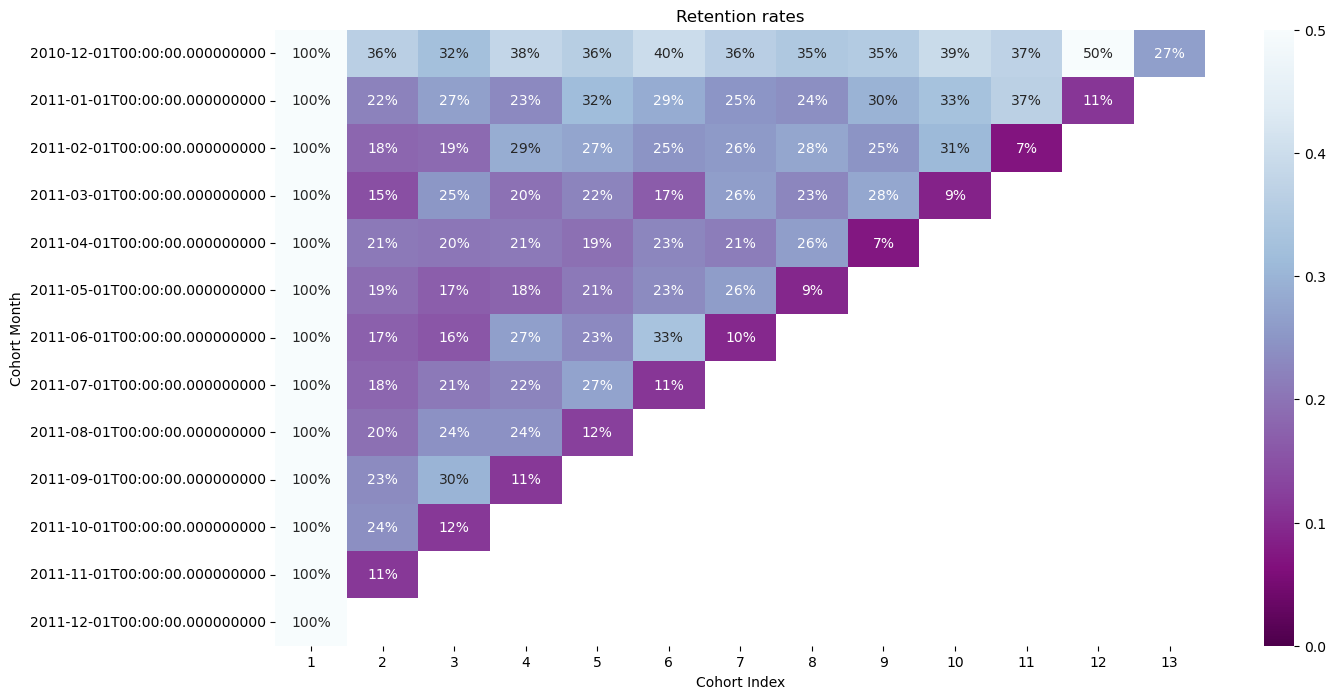

In [49]:
#Build the heatmap
plt.figure(figsize=(15, 8))
plt.title('Retention rates')
sns.heatmap(data=retention,annot = True,fmt = '.0%',vmin = 0.0,vmax = 0.5,cmap="BuPu_r")
plt.xlabel('Cohort Index')
plt.ylabel('Cohort Month')
plt.show()